# Caddisfly data

For original publication of this data, see https://doi.org/10.1007/s00027-020-0698-0

In the paper by van der Lee et al. (2020), the declining model is used to produce 2 datasets. Dataset 1 year 2 represents the first year of observations, where there were large fluctuations in water discharge. Dataset 2 year 2 represents the second year of observations, where the fluctuations in whater discharge were only moderate. <br>
For the example data of this package, timepoints 370 untill 620 from dataset 1 were used.

In [1]:
import sys
sys.path.append('../../src/phloemfinder/')

from phenotype_analysis import PhenotypeAnalysis

In [2]:
caddisfly = PhenotypeAnalysis(bioassay_csv="../caddisfly/caddisfly_data_shorter_y1.csv")

In [3]:
caddisfly.bioassay.head(5)

,sample_id,location,stage,year,day,number
0,st_1,strabekervloedgraaf,eggs,1,1,1
1,st_1,strabekervloedgraaf,eggs,1,2,5
2,st_1,strabekervloedgraaf,eggs,1,3,18
3,st_1,strabekervloedgraaf,eggs,1,4,42
4,st_1,strabekervloedgraaf,eggs,1,5,80


In [4]:
caddisfly.reshape_to_wide(
    sample_id='sample_id', 
    grouping_variable='location', 
    developmental_stages='stage', 
    count_values='number', 
    time='day')

In [5]:
caddisfly.combine_seperately_counted_versions_of_last_recorded_stage(
    exuviea='exuviea',
    late_last_stage='late_fourth_instar', 
    early_last_stage='early_fourth_instar',
    new_last_stage='fourth_instar',
    seperate_exuviea=True, 
    late_last_stage_removed=True, 
    early_last_stage_kept=True,
    remove_individual_stage_columns=True)

In [6]:
caddisfly.convert_counts_to_cumulative(
    n_developmental_stages=5, 
    sample_id='sample_id', 
    eggs='eggs', 
    first_stage='eggs', 
    second_stage='first_instar', 
    third_stage='second_instar', 
    fourth_stage='third_instar',
    fifth_stage='fourth_instar')

In [7]:
caddisfly.prepare_for_plotting(order_of_groups=['bunderbosbeek', 'oude_beek', 'seelbeek', 'strabekervloedgraaf'])

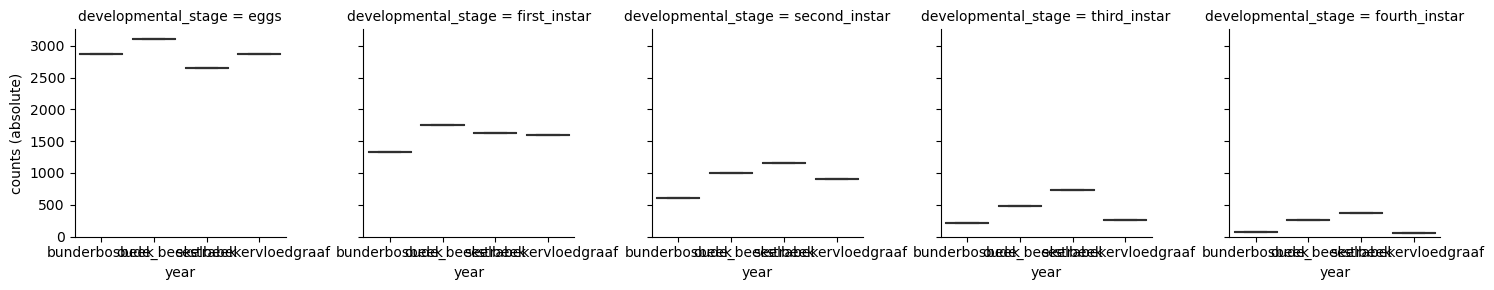

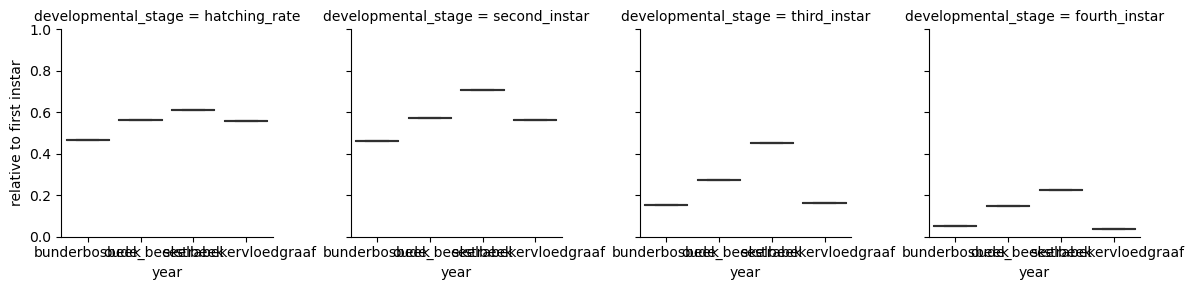

In [8]:
caddisfly.plot_counts_per_stage(
    grouping_variable='location', 
    eggs='eggs', 
    first_stage='first_instar', 
    second_stage='second_instar', 
    third_stage='third_instar', 
    fourth_stage='fourth_instar', 
    make_nymphs_relative_to='first_instar',
    absolute_x_axis_label='year',
    absolute_y_axis_label='counts (absolute)',
    relative_x_axis_label='year',
    relative_y_axis_label='relative to first instar')

                        slope(±sd) maximum(±sd)     emt50(±sd)  reduced_chi2
location                                                                    
bunderbosbeek        -23.12(±1.00)  0.04(±0.00)  150.85(±0.32)           0.0
oude_beek             -9.40(±0.25)  0.15(±0.00)  173.78(±0.62)           0.0
seelbeek              -8.53(±0.10)  0.28(±0.00)  209.18(±0.62)           0.0
strabekervloedgraaf  -43.44(±0.58)  0.04(±0.00)  147.86(±0.05)           0.0


/Users/lissydenkers/Documents/GitHub/phloemfinder/example_data/analyses_example_data/../../src/phloemfinder/phenotype_analysis.py:761: RuntimeWarning: invalid value encountered in log
  return(maximum/(1+np.exp(slope*(np.log(x)-np.log(emt50)))))


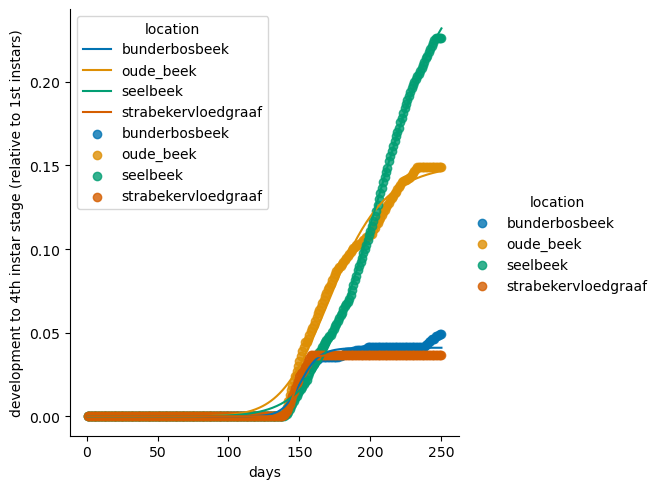

In [11]:
caddisfly.plot_development_over_time_in_fitted_model(
    sample_id='sample_id', 
    grouping_variable='location',
    time='day',
    stage_of_ineterest='fourth_instar',
    use_relative_data=True, 
    make_nymphs_relative_to='first_instar',
    x_axis_label='days',
    y_axis_label='development to 4th instar stage (relative to 1st instars)',
    predict_for_n_days=0)

                         AUC(±sd)    median(±sd)   shape(±sd)  reduced_chi2
location                                                                   
bunderbosbeek         8.02(±1.32)   58.28(±1.38)  7.78(±1.14)           0.0
oude_beek            16.07(±1.36)   72.52(±1.24)  5.63(±0.40)           0.0
seelbeek             28.72(±2.41)  102.72(±2.23)  4.53(±0.28)           0.0
strabekervloedgraaf   9.13(±1.96)   61.26(±2.23)  6.63(±1.24)           0.0


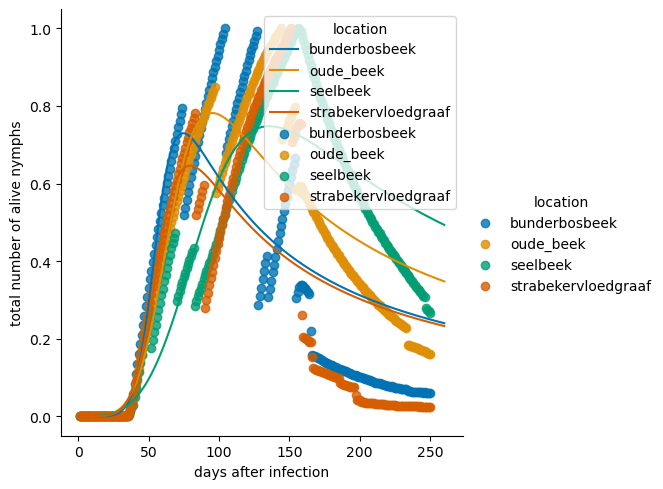

In [87]:
caddisfly.plot_survival_over_time_in_fitted_model(
    sample_id='sample_id', 
    grouping_variable='location',
    time='day',
    stage_of_ineterest='first_instar', 
    x_axis_label='days after infection',
    y_axis_label='total number of alive nymphs',
    use_relative_data=True,
    make_nymphs_relative_to='first_instar',
    predict_for_n_days=10)